In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
 

# Dati scaricati dal sito

In [160]:
prop = pd.read_csv("GWTC.csv")
display(prop)


,id,Name,version,catalog.shortName,GPS,reference,jsonurl,mass_1,mass_1_lw,mass_1_up,...,chirp_mass_lw,chirp_mass_up,redshift,redshift_lw,redshift_up,far,p_astro,final_mass,final_mass_lw,final_mass_up
0,GW150914-v3,GW150914,3,GWTC-1-confident,1.126259e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-confide...,35.6,-3.1,4.7,...,-1.50,1.70,0.09,-0.03,0.03,1.000000e-07,1.00000,63.1,-3.0,3.4
1,GW151012-v3,GW151012,3,GWTC-1-confident,1.128679e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-confide...,23.2,-5.5,14.9,...,-1.20,2.10,0.21,-0.09,0.09,7.920000e-03,1.00000,35.6,-3.8,10.8
2,GW151226-v2,GW151226,2,GWTC-1-confident,1.135136e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-confide...,13.7,-3.2,8.8,...,-0.30,0.30,0.09,-0.04,0.04,1.000000e-07,1.00000,20.5,-1.5,6.4
3,GW170104-v2,GW170104,2,GWTC-1-confident,1.167560e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-confide...,30.8,-5.6,7.3,...,-1.80,2.20,0.20,-0.08,0.08,1.000000e-07,1.00000,48.9,-4.0,5.1
4,GW170608-v3,GW170608,3,GWTC-1-confident,1.180922e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-confide...,11.0,-1.7,5.5,...,-0.20,0.20,0.07,-0.02,0.02,1.000000e-07,1.00000,17.8,-0.7,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,GW200306_093714-v1,GW200306_093714,1,GWTC-3-confident,1.267523e+09,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confide...,28.3,-7.7,17.1,...,-3.00,3.50,0.38,-0.18,0.24,2.400000e+01,0.81156,41.7,-6.9,12.3
86,GW200308_173609-v1,GW200308_173609,1,GWTC-3-confident,1.267724e+09,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confide...,36.4,-9.6,11.2,...,-2.80,4.80,0.83,-0.35,0.32,2.400000e+00,0.85660,47.4,-7.7,11.1
87,GW200311_115853-v1,GW200311_115853,1,GWTC-3-confident,1.267963e+09,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confide...,34.2,-3.8,6.4,...,-2.00,2.40,0.23,-0.07,0.05,1.000000e-05,0.99000,59.0,-3.9,4.8
88,GW200316_215756-v1,GW200316_215756,1,GWTC-3-confident,1.268431e+09,/GWTC-3/,https://gwosc.org/eventapi/json/GWTC-3-confide...,13.1,-2.9,10.2,...,-0.55,0.62,0.22,-0.08,0.08,1.000000e-05,0.99000,20.2,-1.9,7.4


In [161]:
mass = ["GW150914", "GW170729", "GW190521", "GW190924_021846", "GW190426_190642", "GW191109_010717", "GW191129_134029","GW200220_061928","GW200208_222617"]
spin = ["GW190514_065416", "GW190517_055101","GW190719_215514", "GW191109_010717","GW200208_222617","GW200308_173609","GW190403_051519"]
ratio = ["GW190814","GW190412","GW190403_051519", "GW191219_163120","GW200210_092254"]
Ns = ["GW170817", "GW190425"]
NSBH = ["GW191219_163120","GW200115_042309","GW200210_092254","GW190917_114630"]


In [162]:
prop = prop[prop['far']<1]

In [163]:
prop.drop(columns=["id", "version", "catalog.shortName", "reference", "jsonurl", "far", "p_astro"], inplace=True)
prop

,Name,GPS,mass_1,mass_1_lw,mass_1_up,mass_2,mass_2_lw,mass_2_up,snr,snr_lw,...,total_mass_up,chirp_mass,chirp_mass_lw,chirp_mass_up,redshift,redshift_lw,redshift_up,final_mass,final_mass_lw,final_mass_up
0,GW150914,1.126259e+09,35.6,-3.1,4.7,30.6,-4.4,3.0,26.0,-0.2,...,NaN,28.60,-1.50,1.70,0.09,-0.03,0.03,63.1,-3.0,3.4
1,GW151012,1.128679e+09,23.2,-5.5,14.9,13.6,-4.8,4.1,10.0,NaN,...,NaN,15.20,-1.20,2.10,0.21,-0.09,0.09,35.6,-3.8,10.8
2,GW151226,1.135136e+09,13.7,-3.2,8.8,7.7,-2.5,2.2,13.1,NaN,...,NaN,8.90,-0.30,0.30,0.09,-0.04,0.04,20.5,-1.5,6.4
3,GW170104,1.167560e+09,30.8,-5.6,7.3,20.0,-4.6,4.9,13.8,-0.3,...,NaN,21.40,-1.80,2.20,0.20,-0.08,0.08,48.9,-4.0,5.1
4,GW170608,1.180922e+09,11.0,-1.7,5.5,7.6,-2.2,1.4,15.4,NaN,...,NaN,7.90,-0.20,0.20,0.07,-0.02,0.02,17.8,-0.7,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,GW200224_222234,1.266618e+09,40.0,-4.5,6.9,32.5,-7.2,5.0,20.0,-0.2,...,7.2,31.10,-2.60,3.20,0.32,-0.11,0.08,68.6,-4.7,6.6
83,GW200225_060421,1.266646e+09,19.3,-3.0,5.0,14.0,-3.5,2.8,12.5,-0.4,...,3.6,14.20,-1.40,1.50,0.22,-0.10,0.09,32.1,-2.8,3.5
84,GW200302_015811,1.267150e+09,37.8,-8.5,8.7,20.0,-5.7,8.1,10.8,-0.4,...,9.6,23.40,-3.00,4.70,0.28,-0.12,0.16,55.5,-6.6,8.9
87,GW200311_115853,1.267963e+09,34.2,-3.8,6.4,27.7,-5.9,4.1,17.8,-0.2,...,5.3,26.60,-2.00,2.40,0.23,-0.07,0.05,59.0,-3.9,4.8


In [164]:
len(prop["mass_1"])

74

In [165]:
q = np.empty(len(prop["mass_1"]))   #aggiungi una colonna al dataframe

for i in range (len(prop["mass_1"])):
    q[i]=(prop["mass_2"].iloc[i]/prop["mass_1"].iloc[i])



Text(0, 0.5, 'mass2')

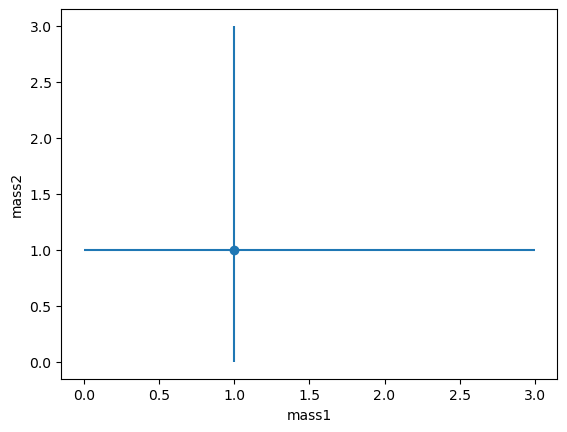

In [166]:
#test of asymmetric boundaries

plt.errorbar(1, 1, xerr= np.array([[1],[2]]), yerr=np.array([[1],[2]]), fmt="o")
plt.xlabel ('mass1')
plt.ylabel ('mass2')

## Histograms

In [167]:
space = np.arange(0,100,3) #to see the mass gap

Mean 33.2027027027027 Max 98.4 Min 1.46


Text(0.5, 0, 'Mass 1 [$M_\\odot$]')

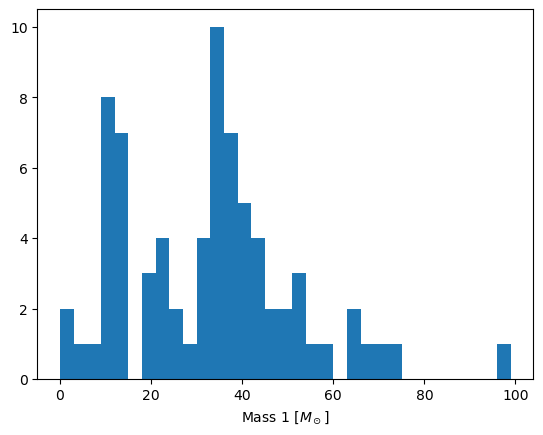

In [168]:
counts, bins = np.histogram(prop["mass_1"],bins=space)
plt.stairs(counts, bins, fill = True)
bins= np.delete(bins, 10)


mean = np.average(bins, weights= counts)
max = np.max(prop["mass_1"])
min = np.min (prop["mass_1"])

print("Mean" , mean, "Max", max, "Min",min)
plt.xlabel("Mass 1 [$M_\odot$]")

In [169]:
space = np.arange(0,70,3)

Mean 21.12162162162162 Max 57.2 Min 1.27


Text(0.5, 0, 'Mass 2 [$M_\\odot$]')

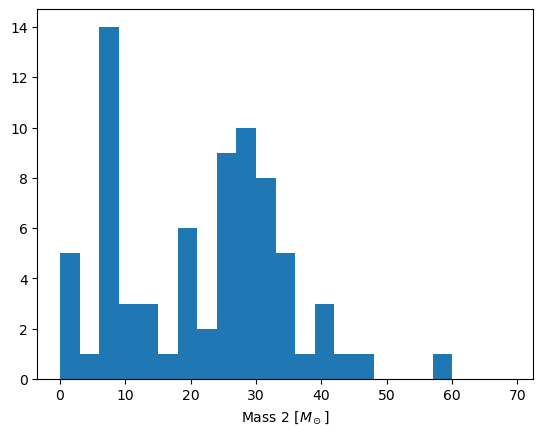

In [170]:
counts, bins = np.histogram(prop["mass_2"],bins=space)
plt.stairs(counts, bins, fill = True)
bins= np.delete(bins, 10)


mean = np.average(bins, weights= counts)
max = np.max(prop["mass_2"])
min = np.min (prop["mass_2"])

print("Mean" , mean, "Max", max, "Min",min)
plt.xlabel("Mass 2 [$M_\odot$]")

Mean 0.658775640241335 Max 0.8698630136986302 Min 0.11158798283261803


Text(0.5, 0, 'Mass ratio q')

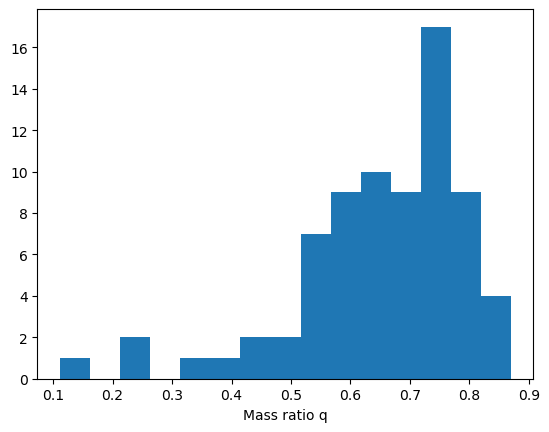

In [171]:
counts, bins = np.histogram(q, bins=15)
plt.stairs(counts, bins, fill = True)
bins= np.delete(bins, 10)


mean = np.average(bins, weights= counts)
max = np.max(q)
min = np.min (q)

print("Mean" , mean, "Max", max, "Min",min)
plt.xlabel("Mass ratio q")

Text(0.5, 0, 'Total mass [$M_\\odot$]')

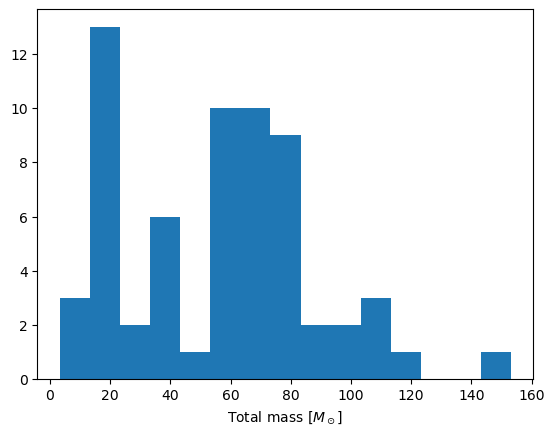

In [172]:
plt.hist(prop["total_mass"],bins=15)
#plt.stairs(counts, bins, fill = True)
#bins= np.delete(bins, 10)
plt.xlabel("Total mass [$M_\odot$]")

#mean = np.average(bins, weights= counts)
#max = np.max(prop["total_mass"])
#min = np.min (prop["total_mass"])

#print("Mean" , mean, "Max", max, "Min",min)




Mean 1789.3243243243244 Max 6130.0 Min 40.0


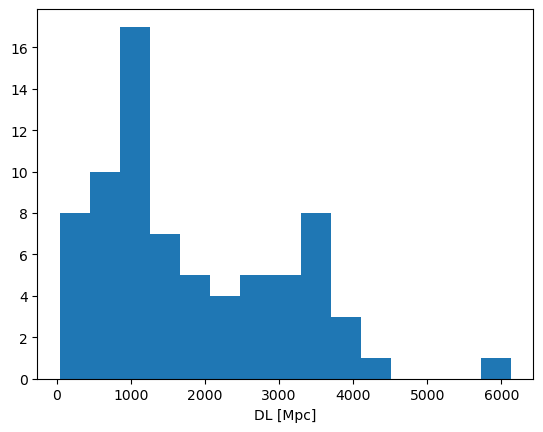

In [173]:
plt.hist(prop["luminosity_distance"],bins=15)
plt.xlabel("DL [Mpc]")

mean = np.mean(prop["luminosity_distance"])
max = np.max(prop["luminosity_distance"])
min = np.min (prop["luminosity_distance"])

print("Mean" , mean, "Max", max, "Min",min)

Mean 0.03675675675675681 Max 0.49 Min -0.29


array([-0.29 , -0.238, -0.186, -0.134, -0.082, -0.03 ,  0.022,  0.074,
        0.126,  0.178,  0.282,  0.334,  0.386,  0.438,  0.49 ])

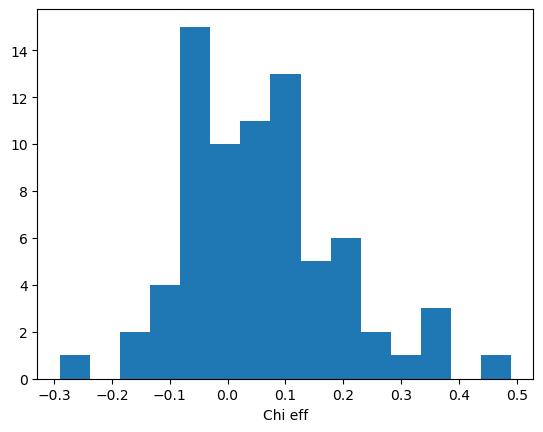

In [174]:
counts, bins = np.histogram(prop["chi_eff"],bins=15)
plt.stairs(counts, bins, fill = True)
bins= np.delete(bins, 10)


mean = np.average(bins, weights= counts)
max = np.max(prop["chi_eff"])
min = np.min (prop["chi_eff"])

print("Mean" , mean, "Max", max, "Min",min)
plt.xlabel("Chi eff")
bins

Mean 22.706162162162162 Max 63.3 Min 1.186


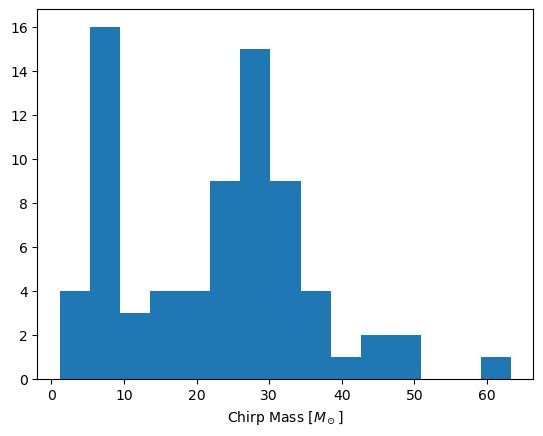

In [175]:
plt.hist(prop["chirp_mass"], bins=15)
plt.xlabel("Chirp Mass [$M_\odot$]")

mean = np.mean(prop["chirp_mass"])
max = np.max(prop["chirp_mass"])
min = np.min (prop["chirp_mass"])

print("Mean" , mean, "Max", max, "Min",min)

Mean 0.3175675675675675 Max 0.92 Min 0.01


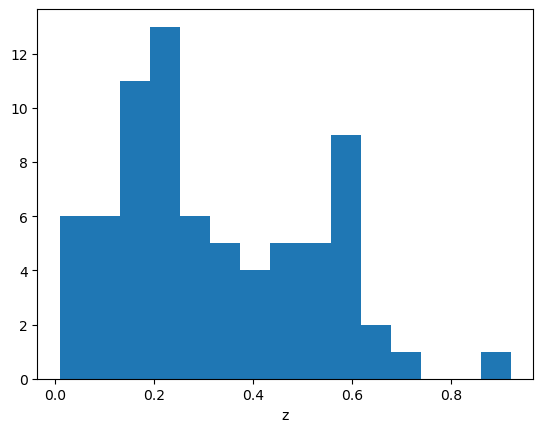

In [176]:
plt.hist(prop["redshift"],bins=15)
plt.xlabel("z")

mean = np.mean(prop["redshift"])
max = np.max(prop["redshift"])
min = np.min (prop["redshift"])

print("Mean" , mean, "Max", max, "Min",min)

Mean 52.78958904109589 Max 147.4 Min 2.8


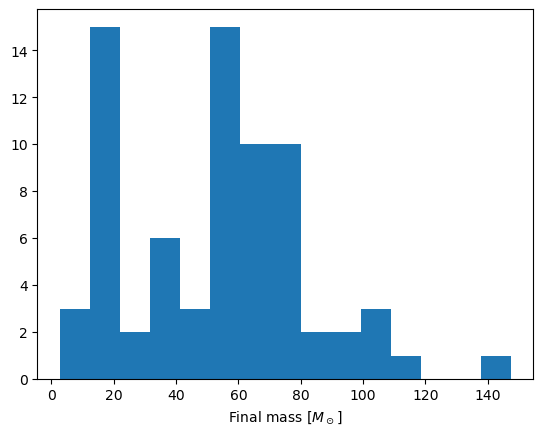

In [177]:
plt.hist(prop["final_mass"],bins=15)
plt.xlabel("Final mass [$M_\odot$]")

mean = np.mean(prop["final_mass"])
max = np.max(prop["final_mass"])
min = np.min (prop["final_mass"])

print("Mean" , mean, "Max", max, "Min",min)

Mean 13.313513513513511 Max 33.0 Min 7.9


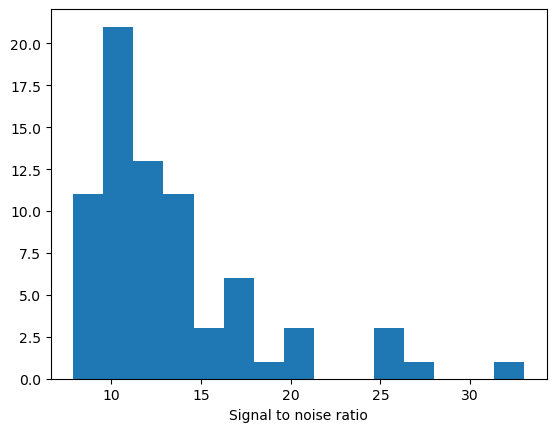

In [178]:
plt.hist(prop["snr"],bins=15)
plt.xlabel("Signal to noise ratio")

mean = np.mean(prop["snr"])
max = np.max(prop["snr"])
min = np.min (prop["snr"])

print("Mean" , mean, "Max", max, "Min",min)

# Graphs

In [179]:
def graph(a,b,erralw, erraup, errblw, errbup):
    df_mass = prop[prop['Name'].isin(mass)]
    df_spin = prop[prop['Name'].isin(spin)]
    df_ratio = prop[prop['Name'].isin(ratio)]
    df_ns = prop[prop['Name'].isin(Ns)]
    df_nsbh = prop[prop['Name'].isin(NSBH)]

    plt.errorbar(prop[a], prop[b], xerr= [abs(prop[erralw]),prop[erraup]], yerr= [abs(prop[errblw]),prop[errbup]], fmt="o", color = "b", label = "sources")
    plt.errorbar(df_mass[a], df_mass[b], xerr= [abs(df_mass[erralw]),df_mass[erraup]], yerr= [abs(df_mass[errblw]),df_mass[errbup]], fmt="o", color = "r", label = "sources with significant mass" )
    plt.errorbar(df_spin[a], df_spin[b], xerr= [abs(df_spin[erralw]),df_spin[erraup]], yerr= [abs(df_spin[errblw]),df_spin[errbup]], fmt="o", color = "m", label= "sources with significant spin" )
    plt.errorbar(df_ratio[a], df_ratio[b], xerr= [abs(df_ratio[erralw]),df_ratio[erraup]], yerr= [abs(df_ratio[errblw]),df_ratio[errbup]], fmt="o", color = "y", label = "sources with significant mass ratio")
    plt.errorbar(df_ns[a], df_ns[b], xerr= [abs(df_ns[erralw]),df_ns[erraup]], yerr= [abs(df_ns[errblw]),df_ns[errbup]],  fmt="o", color = "g", label= "neutron star systems" )
    plt.errorbar(df_nsbh[a], df_nsbh[b], xerr= [abs(df_nsbh[erralw]),df_nsbh[erraup]], yerr= [abs(df_nsbh[errblw]),df_nsbh[errbup]],  fmt="o", color = "k", label= "neutron star black holes systems" )
    plt.legend(fontsize = 8)   


In [180]:
def correlation(name1, name2):
    meanq = np.mean(prop[name1])
    meanchi = np.mean(prop[name2])


    cov = 0 #covariance
    sq = 0 #standard deviation
    sc = 0 #standard deviation
    for i in range (len(prop[name1])):
        if(np.isnan(prop[name1].iloc[i])==False and np.isnan(prop[name2].iloc[i])==False):
            cov = cov + (prop[name1].iloc[i]-meanq)*(prop[name2].iloc[i]-meanchi)
            sq = sq + (prop[name1].iloc[i]-meanq)**2
            sc = sc + (prop[name2].iloc[i]-meanchi)**2

    r = cov/( math.sqrt(sq)* math.sqrt(sc))
    print(r)

## Mass 1 vs Mass 2

(0.0, 10.0)

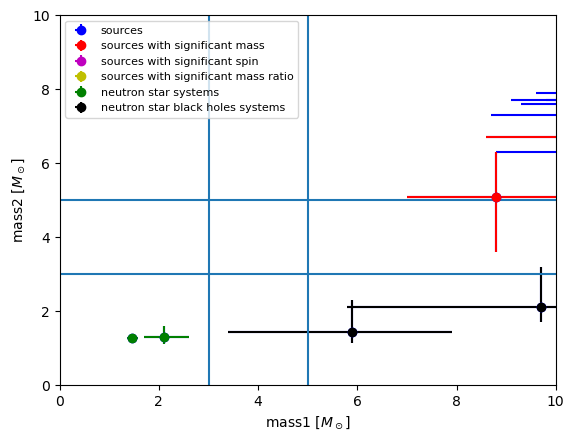

In [181]:
graph("mass_1", "mass_2", "mass_1_lw", "mass_1_up", "mass_2_lw", "mass_2_up")
 
plt.xlabel ('mass1 [$M_\odot$]')
plt.ylabel ('mass2 [$M_\odot$]')

plt.hlines(y=3, xmin=0, xmax=160)
plt.hlines(y=5, xmin=0, xmax=160)
plt.hlines(y=50, xmin=0, xmax=160)
plt.hlines(y=120, xmin=0, xmax=160)

plt.vlines(3, ymin = 0, ymax=120)
plt.vlines(5, ymin = 0, ymax=120)
plt.vlines(50, ymin = 0, ymax=120)
plt.vlines(120, ymin = 0, ymax=120)

plt.xlim(0,10)
plt.ylim(0,10)

In [182]:
correlation("mass_1", "mass_2")

0.9331378866779582


### Mass 1 vs total Mass

Text(0, 0.5, 'total mass [$M_\\odot$]')

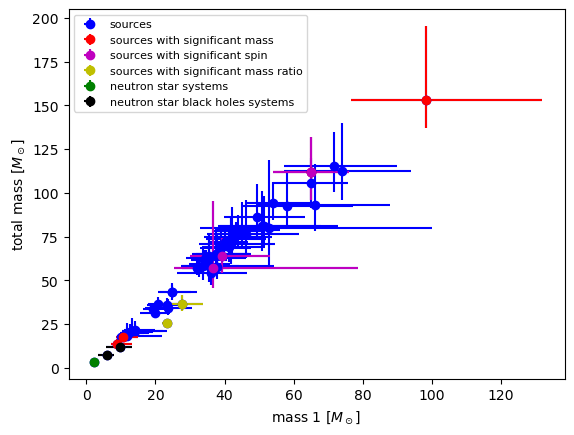

In [183]:
graph("mass_1", "total_mass", "mass_1_lw", "mass_1_up", "total_mass_lw", "total_mass_up")

plt.xlabel ('mass 1 [$M_\odot$]')
plt.ylabel ('total mass [$M_\odot$]')


In [184]:
correlation("mass_2", "total_mass")

0.9738760472319162


### Mass 2 vs Total mass

Text(0, 0.5, 'total mass [$M_\\odot$]')

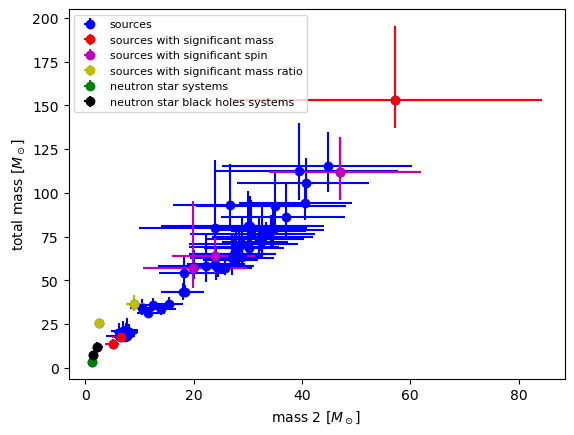

In [185]:
graph("mass_2", "total_mass", "mass_2_lw", "mass_2_up", "total_mass_lw", "total_mass_up")

plt.xlabel ('mass 2 [$M_\odot$]')
plt.ylabel ('total mass [$M_\odot$]')

### Total mass vs Distance

Text(0, 0.5, 'Dl [Mpc]')

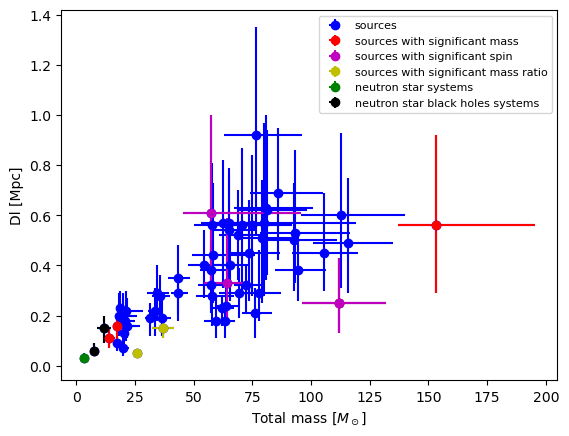

In [186]:
graph( "total_mass", "redshift", "total_mass_lw", "total_mass_up","redshift_lw", "redshift_up")

plt.xlabel ('Total mass [$M_\odot$]')
plt.ylabel ('Dl [Mpc]')

In [187]:
correlation("luminosity_distance", "total_mass")

0.681217966085156


### Mass 1 vs Distance

Text(0, 0.5, 'Dl [Mpc]')

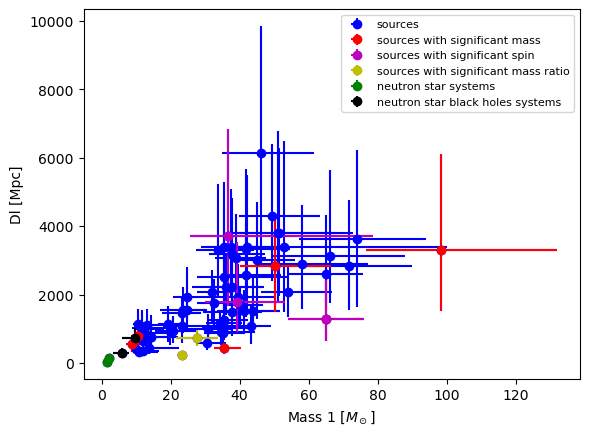

In [188]:
graph("mass_1","luminosity_distance", "mass_1_lw", "mass_1_up", "luminosity_distance_lw", "luminosity_distance_up")
plt.xlabel ('Mass 1 [$M_\odot$]')
plt.ylabel ('Dl [Mpc]')

In [189]:
correlation("luminosity_distance", "mass_1")

0.6895222177178406


Text(0, 0.5, 'Dl [Mpc]')

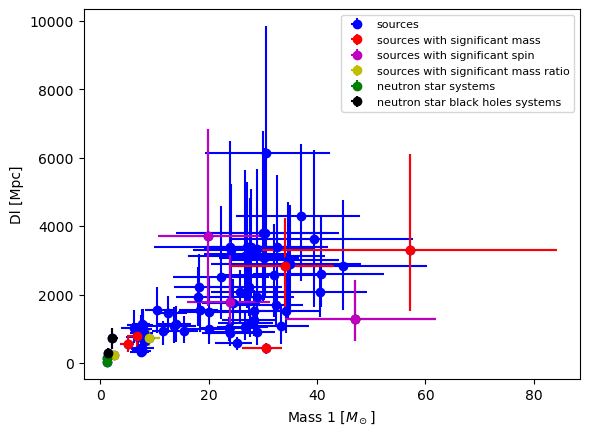

In [190]:
graph("mass_2","luminosity_distance", "mass_2_lw", "mass_2_up", "luminosity_distance_lw", "luminosity_distance_up")
plt.xlabel ('Mass 1 [$M_\odot$]')
plt.ylabel ('Dl [Mpc]')

### Dl vs z

Text(0, 0.5, 'z')

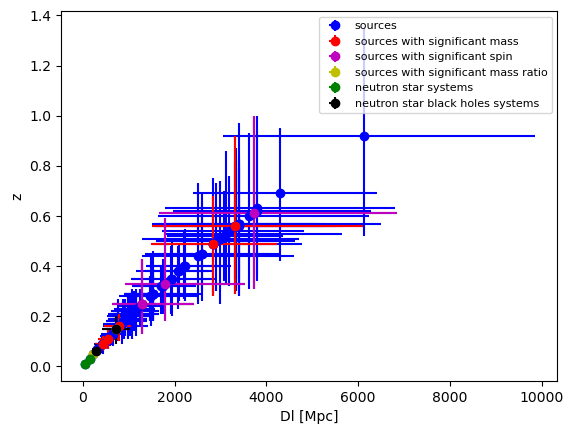

In [191]:
graph("luminosity_distance", "redshift", "luminosity_distance_lw", "luminosity_distance_up", "redshift_lw", "redshift_up")

plt.xlabel ('Dl [Mpc]')
plt.ylabel ('z')   #look for luminosity distance and z relation


In [192]:
correlation("redshift", "luminosity_distance")

0.9971380074797414


## Mass ratio vs mass

In [193]:


meanerrm1= np.empty(len(q))
for i in range (len(q)):
    meanerrm1[i]=abs(prop["mass_1_lw"].iloc[i]-prop["mass_1_up"].iloc[i])/2.
    
meanerrm2= np.empty(len(q))
for i in range (len(q)):
    meanerrm2[i]=abs(prop["mass_2_lw"].iloc[i]-prop["mass_2_up"].iloc[i])/2.


In [194]:
errq= np.empty(len(q))
for i in range (len(q)):
    errq[i]= math.sqrt((prop["mass_2"].iloc[i]/prop["mass_1"].iloc[i]**2)**2*meanerrm1[i]**2+(1/prop["mass_1"].iloc[i])**2*meanerrm2[i]**2)

In [195]:
prop.insert(len(prop.columns), "ratio",q)
prop.insert(len(prop.columns), "ratio_err", errq)


C:\Users\sarev\AppData\Local\Temp\ipykernel_22672\4140967454.py:4: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,1))


Text(0, 0.5, 'ratio')

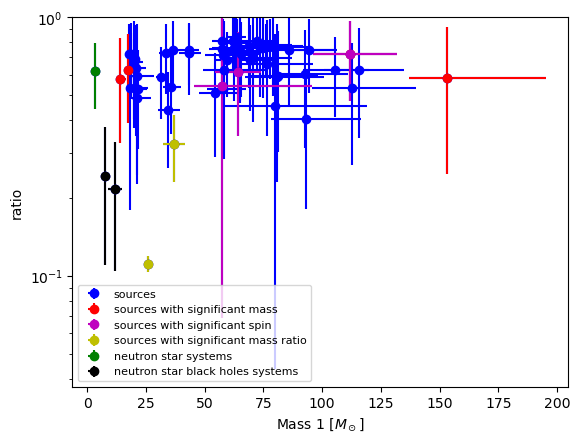

In [196]:
graph("total_mass", "ratio", "total_mass_lw", "total_mass_up", "ratio_err", "ratio_err")
#graph(totm, q, totm_err, totm_err )
plt.yscale("log")
plt.ylim((0,1))

plt.xlabel ('Mass 1 [$M_\odot$]')
plt.ylabel ('ratio')


In [197]:
correlation("ratio", "total_mass")

0.2725200507834309


## Mass ratio vs spin

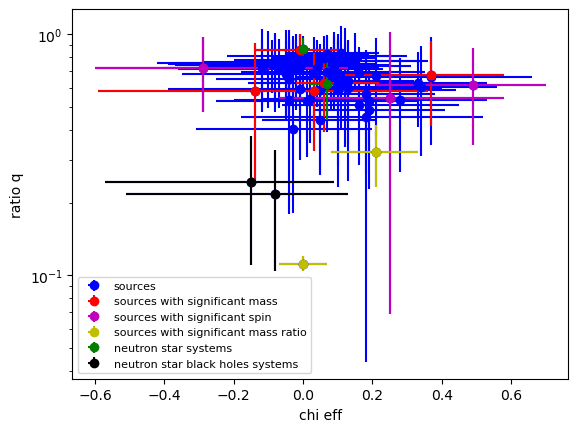

In [198]:
graph("chi_eff", "ratio", "chi_eff_lw", "chi_eff_up", "ratio_err", "ratio_err")
plt.xlabel("chi eff")
plt.ylabel("ratio q")
plt.yscale("log")

In [199]:
correlation("ratio", "chi_eff")

-0.10957383603547756


### Chrip mass vs Total mass

In [200]:
def chirp_mass(q,M):
    return ( np.ones(len(M))*(q/(1+q)**2)**(3./5.)*M)

M = np.linspace(0,200)

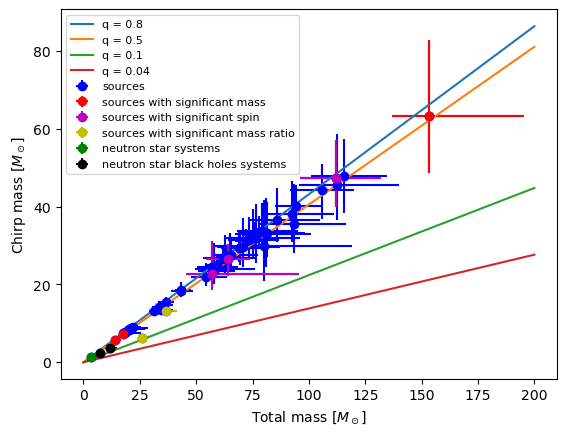

In [201]:
graph("total_mass", "chirp_mass", "total_mass_lw", "total_mass_up", "chirp_mass_lw", "chirp_mass_up")

plt.xlabel ('Total mass [$M_\odot$]')
plt.ylabel ('Chirp mass [$M_\odot$]')

chirp_mass1 = chirp_mass(0.8,M)
chirp_mass2 = chirp_mass(0.5,M)
chirp_mass3 = chirp_mass(0.1,M) 
chirp_mass4 = chirp_mass(0.04,M) 

plt.plot(M, chirp_mass1, label= "q = 0.8")
plt.plot(M, chirp_mass2, label= "q = 0.5")
plt.plot(M, chirp_mass3, label= "q = 0.1")
plt.plot(M, chirp_mass4, label= "q = 0.04")
plt.legend(fontsize= 8 )


In [202]:
correlation("chirp_mass", "total_mass")

0.9963143691917309


### Mass 1 vs Chirp mass

Text(0, 0.5, 'chirp [$M_\\odot$]')

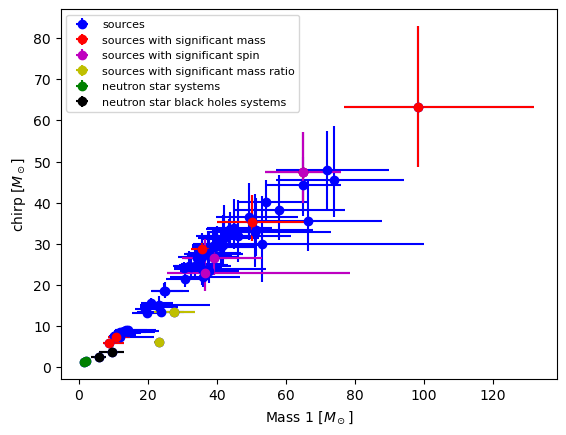

In [203]:
graph("mass_1", "chirp_mass", "mass_1_lw", "mass_1_up", "chirp_mass_lw", "chirp_mass_up")
plt.xlabel ('Mass 1 [$M_\odot$]')
plt.ylabel ('chirp [$M_\odot$]')

### Chirp mass vs distance

Text(0, 0.5, 'Distance [Mpc]')

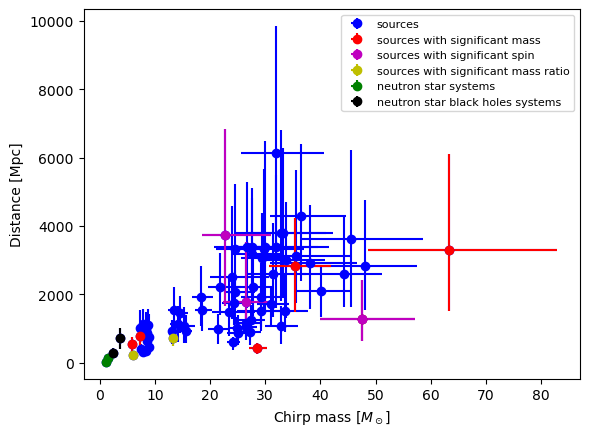

In [204]:
graph("chirp_mass", "luminosity_distance", "chirp_mass_lw", "chirp_mass_up", "luminosity_distance_lw", "luminosity_distance_up")

plt.xlabel ('Chirp mass [$M_\odot$]')
plt.ylabel ('Distance [Mpc]')

In [205]:
correlation("luminosity_distance", "chirp_mass")

0.6757242546992538


### Spin vs Mass

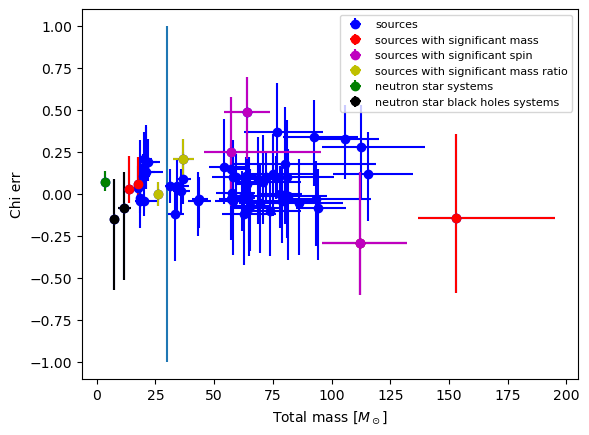

In [206]:
graph("total_mass", "chi_eff" , "total_mass_lw" , "total_mass_up" , "chi_eff_lw" , "chi_eff_up" )
plt.xlabel ('Total mass [$M_\odot$]')
plt.ylabel ('Chi err')

plt.vlines(x=30, ymin= -1, ymax= +1)

In [207]:
correlation("chi_eff", "total_mass")

0.004197031162391534


### Spin vs mass 1

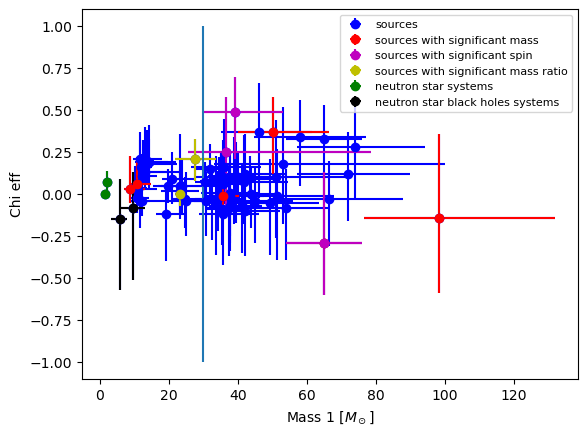

In [208]:
graph("mass_1", "chi_eff" , "mass_1_lw" , "mass_1_up" , "chi_eff_lw" , "chi_eff_up" )
plt.xlabel ('Mass 1 [$M_\odot$]')
plt.ylabel ('Chi eff')
plt.legend(loc="upper right", fontsize= 8)

plt.vlines(x=30, ymin= -1, ymax= +1)

In [209]:
correlation("chi_eff", "mass_1")

0.0596475976725338


### Spin vs distance

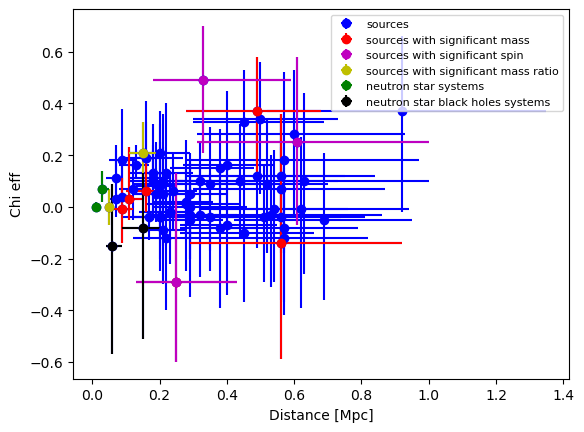

In [210]:
graph("redshift", "chi_eff" , "redshift_lw" , "redshift_up" , "chi_eff_lw" , "chi_eff_up" )

plt.xlabel ('Distance [Mpc]')
plt.ylabel ('Chi eff')
plt.legend(loc="upper right", fontsize= 8)

#plt.xlim([0,6000])

### Spin vs Chirp

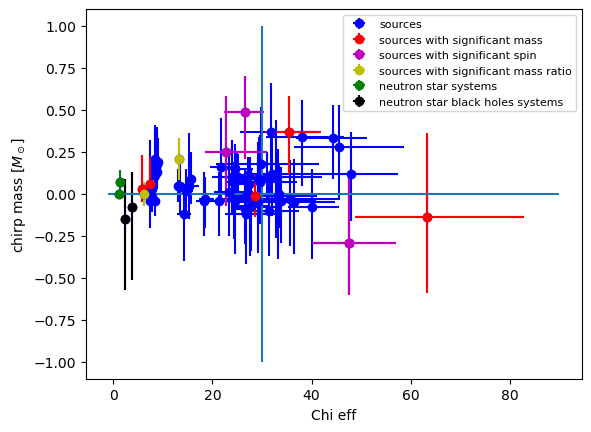

In [211]:
graph("chirp_mass", "chi_eff" , "chirp_mass_lw" , "chirp_mass_up" , "chi_eff_lw" , "chi_eff_up" )

plt.xlabel ('Chi eff')
plt.ylabel ('chirp mass [$M_\odot$]')
plt.vlines(x=30, ymin = -1, ymax= 1)
plt.hlines(y=0, xmin = -1, xmax= 90)

In [212]:
correlation("chi_eff", "chirp_mass")

0.01874965651344943


### final mss vs total mass

c:\Users\sarev\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
c:\Users\sarev\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


Text(0, 0.5, 'Total mass [$M_\\odot$]')

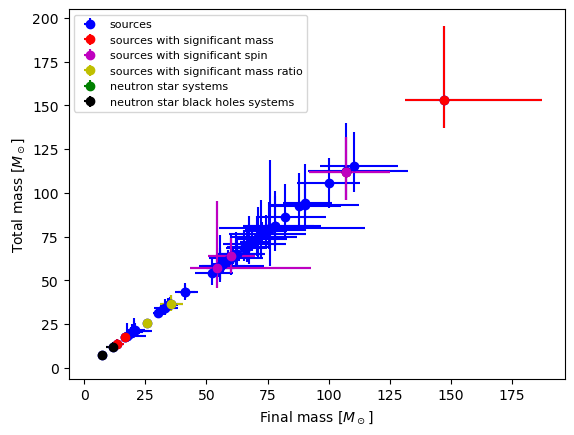

In [213]:
graph("final_mass", "total_mass", "final_mass_lw", "final_mass_up", "total_mass_lw", "total_mass_up")

plt.xlabel ('Final mass [$M_\odot$]')
plt.ylabel ('Total mass [$M_\odot$]')

In [214]:
correlation("final_mass", "total_mass")

0.9997930594225501


### SNR vs tot mass

Text(0, 0.5, 'Total mass [$M_\\odot$]')

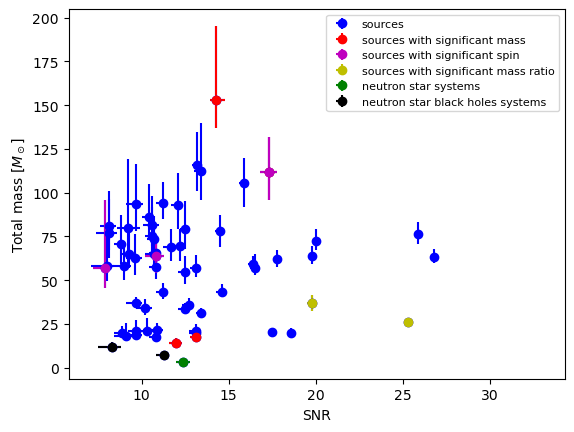

In [215]:
graph("snr", "total_mass", "snr_lw", "snr_up", "total_mass_lw", "total_mass_up")


plt.xlabel ('SNR')
plt.ylabel ('Total mass [$M_\odot$]')

### SNR vs chirp

Text(0, 0.5, 'chirp mass [$M_\\odot$]')

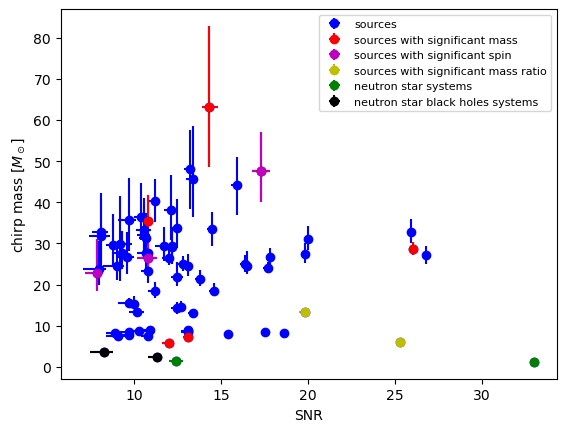

In [216]:
graph("snr", "chirp_mass", "snr_lw", "snr_up", "chirp_mass_lw", "chirp_mass_up")
plt.xlabel ('SNR')
plt.ylabel ('chirp mass [$M_\odot$]')

In [217]:
correlation("snr", "chirp_mass")

-0.03630172126475167


### SNR vs distance

Text(0, 0.5, 'Distance')

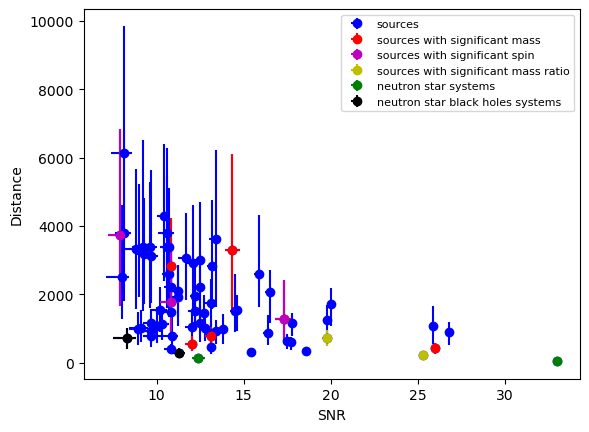

In [218]:
graph("snr", "luminosity_distance", "snr_lw", "snr_up", "luminosity_distance_lw", "luminosity_distance_up")
plt.xlabel ('SNR')
plt.ylabel ('Distance')

### SNR vs spin

Text(0, 0.5, 'Chi eff')

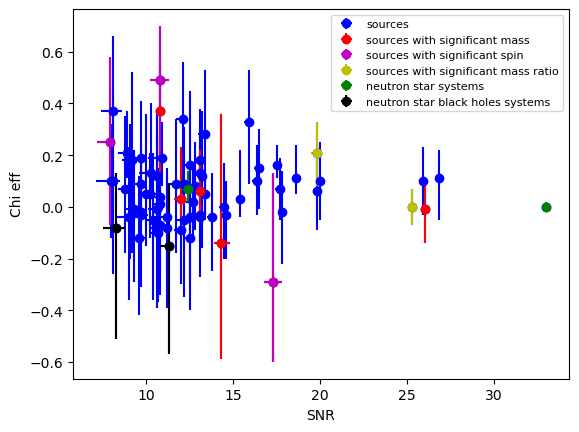

In [219]:
graph("snr", "chi_eff", "snr_lw", "snr_up", "chi_eff_lw", "chi_eff_up")

plt.xlabel ('SNR')
plt.ylabel ('Chi eff')

## Time evolution

In [ ]:
graph("GPS", "total_mass", "mass_1_lw", "mass_1_up", "total_mass_lw", "total_mass_up")

plt.xlabel ('mass 1 [$M_\odot$]')
plt.ylabel ('total mass [$M_\odot$]')
